### KJ MoChroi   
### Image Classification  
### DSC650: Big Data  
### Spring 2023  

In [1]:
# mounting drive to assignment06 folder
import os
from google.colab import drive
drive.mount('/content/drive', force_remount = True)
os.chdir('/content/drive/My Drive/Colab Notebooks/DSC650/assignments/assignment06')
!pwd

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/DSC650/assignments/assignment06


# CNN - MNIST Dataset Classification

##Model

In [2]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow
from keras import layers
from keras import models
from keras.datasets import mnist
from keras.datasets import cifar10
from keras.utils import to_categorical


In [4]:
# import data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
# reshape and reformat data

train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [6]:
# generate instance of sequential model
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [7]:
# compile
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# holdout validation

validation_images = train_images[:10000]
partial_train_images = train_images[10000:]

validation_labels = train_labels[:10000]
partial_train_labels = train_labels[10000:]

In [9]:
# csvlogger
from keras.callbacks import CSVLogger
csv_logger = CSVLogger('results/CNN_mnist_training.log')

In [10]:
#  train model
history = model.fit(partial_train_images, 
                    partial_train_labels, 
                    epochs=10, 
                    batch_size=64,
                    validation_data=(validation_images,validation_labels),
                    callbacks=[csv_logger])

Epoch 1/10
782/782 [==============================] - 21s 10ms/step - loss: 0.2002 - accuracy: 0.9389 - val_loss: 0.1178 - val_accuracy: 0.9668
Epoch 2/10
782/782 [==============================] - 6s 8ms/step - loss: 0.0494 - accuracy: 0.9855 - val_loss: 0.0478 - val_accuracy: 0.9860
Epoch 3/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0345 - accuracy: 0.9896 - val_loss: 0.0421 - val_accuracy: 0.9882
Epoch 4/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0255 - accuracy: 0.9920 - val_loss: 0.0450 - val_accuracy: 0.9874
Epoch 5/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0201 - accuracy: 0.9940 - val_loss: 0.0383 - val_accuracy: 0.9903
Epoch 6/10
782/782 [==============================] - 4s 4ms/step - loss: 0.0159 - accuracy: 0.9949 - val_loss: 0.0493 - val_accuracy: 0.9871
Epoch 7/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0127 - accuracy: 0.9962 - val_loss: 0.0407 - val_accuracy: 0.9896
Epoc

In [11]:
# save the model
model.save('results/CNN_mnist_model')
model.save('results/CNN_mnist_model.h5')

## Predictions

In [12]:
predictions = model.predict(test_images)
predictions.tofile('results/CNN_mnist_predictions.csv', sep = ',')

313/313 [==============================] - 1s 2ms/step


In [13]:
max_test_labels = np.argmax(test_labels, axis=1)

max_predictions = np.argmax(predictions, axis=1)

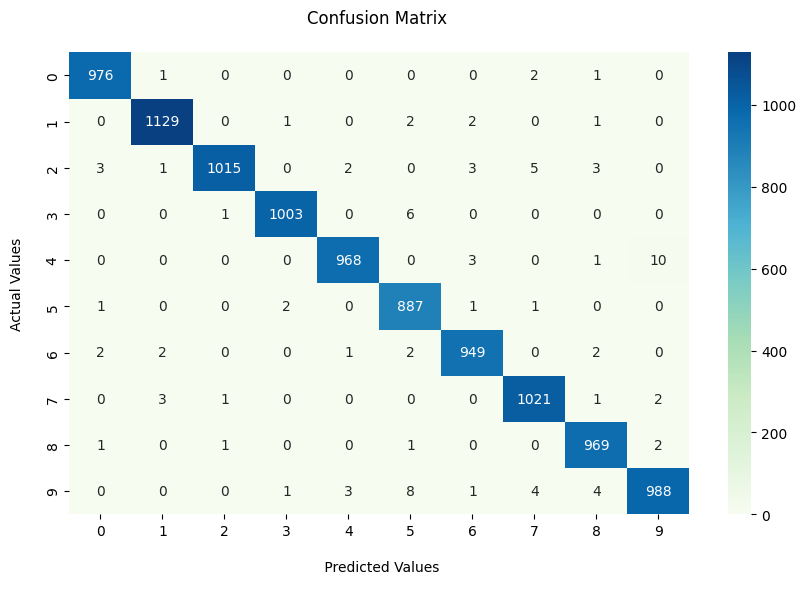

In [14]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(max_test_labels, max_predictions)
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion, annot=True, fmt=".0f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');

plt.savefig("results/CNN_mnist_confusionmatrix.png")

plt.show()

## Metrics

In [15]:
results = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0474 - accuracy: 0.9905


In [16]:
from sklearn.metrics import classification_report
class_report = classification_report(max_test_labels, max_predictions)
print(class_report)
#open text file
text_file = open("results/CNN_mnist_metrics.txt", "w")

#write string to file
text_file.write(class_report)

#close file
text_file.close()


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       1.00      0.98      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



## Validation Plots

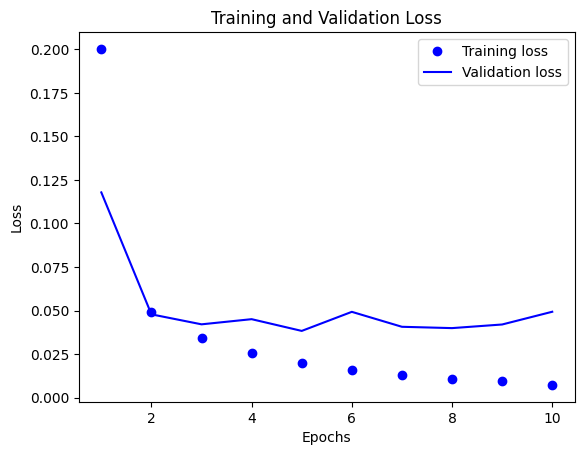

In [17]:
# plot loss

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.savefig("results/CNN_mnist_loss.png")

plt.show()

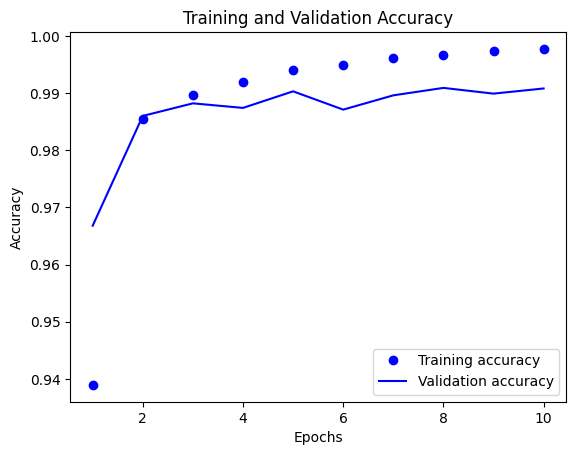

In [18]:
# plot accuracy

plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.savefig("results/CNN_mnist_accuracy.png")

plt.show()

# CNN - CIFAR10 Small Image Classification Dataset

## Model

In [19]:
# load data
 
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

170498071/170498071 [==============================] - 2s 0us/step


In [20]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [21]:
# holdout validation

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [22]:
from keras.preprocessing.image import ImageDataGenerator

In [23]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# train_datagen.fit(x_train)

batch_size = 32 

train_generator = train_datagen.flow(x_train, 
                                     y_train,
                                     batch_size=batch_size,
                                     shuffle=False)

validation_generator = test_datagen.flow(x_val,
                                         y_val,
                                         batch_size=batch_size,
                                         shuffle=False)

test_generator = test_datagen.flow(
    x_test,
    y_test,
    batch_size=batch_size,
    shuffle=False)

In [24]:
# model

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3))) # output shape (30, 30, 32)
model.add(layers.MaxPooling2D((2,2))) # output shape (15, 15, 32)
model.add(layers.Conv2D(64, (3,3), activation='relu')) # output shape (13, 13, 64)
model.add(layers.MaxPooling2D((2,2))) # output shape (6, 6, 64)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [25]:
# compile
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [26]:
# csvlogger
from keras.callbacks import CSVLogger
csv_logger = CSVLogger('results/CNN_cifar10_training.log')

In [27]:
#  train model
train_generator.reset()
validation_generator.reset()
history = model.fit(train_generator,
                              steps_per_epoch=len(x_train) // batch_size, 
                              epochs=30, 
                              validation_data=validation_generator,
                              validation_steps=50,
                              callbacks=[csv_logger])

Epoch 1/30
1562/1562 [==============================] - 11s 6ms/step - loss: 1.4046 - accuracy: 0.5003 - val_loss: 0.9945 - val_accuracy: 0.6369
Epoch 2/30
1562/1562 [==============================] - 9s 5ms/step - loss: 0.9994 - accuracy: 0.6528 - val_loss: 0.7725 - val_accuracy: 0.7344
Epoch 3/30
1562/1562 [==============================] - 8s 5ms/step - loss: 0.8096 - accuracy: 0.7213 - val_loss: 0.6642 - val_accuracy: 0.7688
Epoch 4/30
1562/1562 [==============================] - 9s 6ms/step - loss: 0.6627 - accuracy: 0.7726 - val_loss: 0.5261 - val_accuracy: 0.8263
Epoch 5/30
1562/1562 [==============================] - 9s 6ms/step - loss: 0.5367 - accuracy: 0.8167 - val_loss: 0.3989 - val_accuracy: 0.8562
Epoch 6/30
1562/1562 [==============================] - 9s 6ms/step - loss: 0.4266 - accuracy: 0.8543 - val_loss: 0.2688 - val_accuracy: 0.9187
Epoch 7/30
1562/1562 [==============================] - 8s 5ms/step - loss: 0.3345 - accuracy: 0.8869 - val_loss: 0.2933 - val_accuracy

In [28]:
# save the model
model.save('results/CNN_cifar10_model')
model.save('results/CNN_cifar10_model.h5')

## Predictions

In [29]:
test_generator.reset()
predictions = model.predict(test_generator,steps = len(x_test) // batch_size)
predictions.tofile('results/CNN_cifar10_predictions.csv', sep = ',')

312/312 [==============================] - 1s 3ms/step


In [30]:
predictions.shape

(9984, 10)

In [31]:
max_y_test = np.argmax(y_test[:9984], axis=1)

max_predictions = np.argmax(predictions, axis=1)

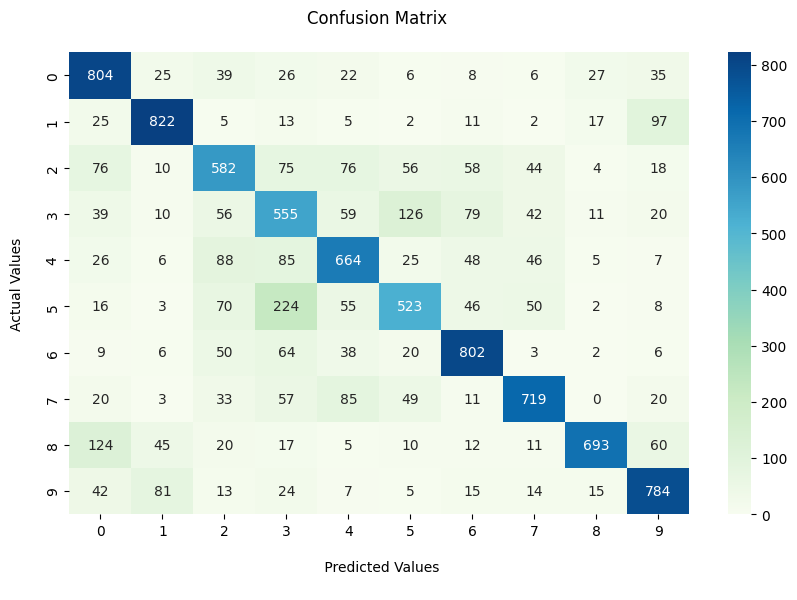

In [32]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(max_y_test, max_predictions)
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion, annot=True, fmt=".0f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');

plt.savefig("results/CNN_cifar10_confusionmatrix.png")

plt.show()

## Metrics

In [33]:
test_generator.reset()
results = model.evaluate(test_generator)

313/313 [==============================] - 1s 4ms/step - loss: 4.7792 - accuracy: 0.6958


In [34]:
from sklearn.metrics import classification_report
class_report = classification_report(max_y_test, max_predictions)
print(class_report)

#open text file
text_file = open("results/CNN_cifar10_metrics.txt", "w")

#write string to file
text_file.write(class_report)

#close file
text_file.close()

              precision    recall  f1-score   support

           0       0.68      0.81      0.74       998
           1       0.81      0.82      0.82       999
           2       0.61      0.58      0.60       999
           3       0.49      0.56      0.52       997
           4       0.65      0.66      0.66      1000
           5       0.64      0.52      0.58       997
           6       0.74      0.80      0.77      1000
           7       0.77      0.72      0.74       997
           8       0.89      0.70      0.78       997
           9       0.74      0.78      0.76      1000

    accuracy                           0.70      9984
   macro avg       0.70      0.70      0.70      9984
weighted avg       0.70      0.70      0.70      9984



## Validation Plots

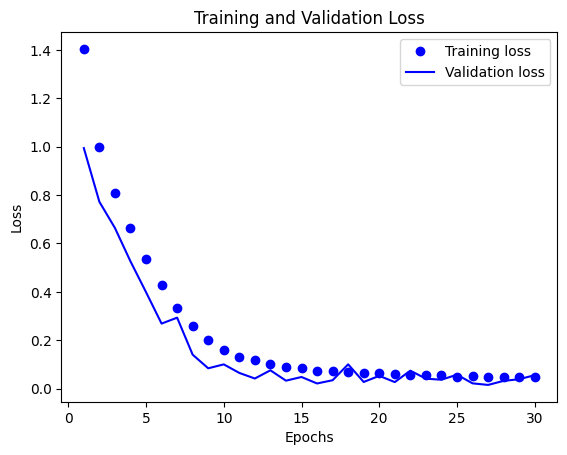

In [35]:
# plot loss

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.savefig("results/CNN_cifar10_loss.png")

plt.show()

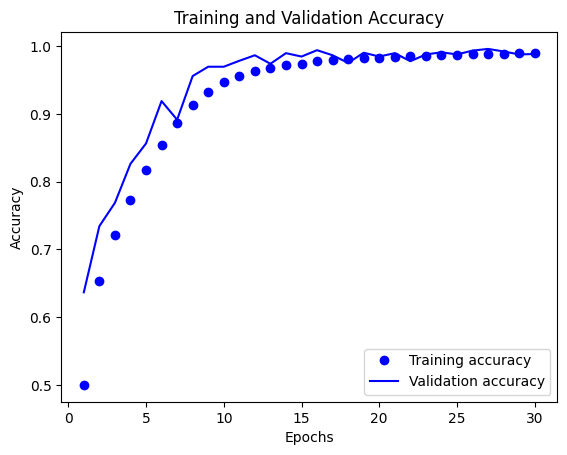

In [36]:
# plot accuracy

plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.savefig("results/CNN_cifar10_accuracy.png")

plt.show()

# CNN - CIFAR10 Small Image Classification Dataset with dropout and data augmentation

## Model

In [37]:
# load data
 
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [38]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [39]:
# holdout validation

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [40]:
from keras.preprocessing.image import ImageDataGenerator

In [41]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# train_datagen.fit(x_train)

batch_size = 32 

train_generator = train_datagen.flow(x_train, 
                                     y_train,
                                     batch_size=batch_size,
                                     shuffle=False)

validation_generator = test_datagen.flow(x_val,
                                         y_val,
                                         batch_size=batch_size,
                                         shuffle=False)

test_generator = test_datagen.flow(
    x_test,
    y_test,
    batch_size=batch_size,
    shuffle=False)

In [42]:
# model

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3))) # output shape (30, 30, 32)
model.add(layers.MaxPooling2D((2,2))) # output shape (15, 15, 32)
model.add(layers.Conv2D(64, (3,3), activation='relu')) # output shape (13, 13, 64)
model.add(layers.MaxPooling2D((2,2))) # output shape (6, 6, 64)
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [43]:
# compile
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [44]:
# csvlogger
from keras.callbacks import CSVLogger
csv_logger = CSVLogger('results/CNN_cifar10_augmented_training.log')

In [45]:
#  train model
train_generator.reset()
validation_generator.reset()
history = model.fit(train_generator,
                              steps_per_epoch=len(x_train) // batch_size, 
                              epochs=30, 
                              validation_data=validation_generator,
                              validation_steps=50,
                              callbacks=[csv_logger])

Epoch 1/30
1562/1562 [==============================] - 38s 23ms/step - loss: 1.8116 - accuracy: 0.3386 - val_loss: 1.5423 - val_accuracy: 0.4394
Epoch 2/30
1562/1562 [==============================] - 37s 24ms/step - loss: 1.6054 - accuracy: 0.4214 - val_loss: 1.3397 - val_accuracy: 0.5219
Epoch 3/30
1562/1562 [==============================] - 38s 24ms/step - loss: 1.5310 - accuracy: 0.4499 - val_loss: 1.2386 - val_accuracy: 0.5688
Epoch 4/30
1562/1562 [==============================] - 47s 30ms/step - loss: 1.4870 - accuracy: 0.4679 - val_loss: 1.1367 - val_accuracy: 0.6200
Epoch 5/30
1562/1562 [==============================] - 39s 25ms/step - loss: 1.4581 - accuracy: 0.4819 - val_loss: 1.0925 - val_accuracy: 0.6306
Epoch 6/30
1562/1562 [==============================] - 53s 34ms/step - loss: 1.4384 - accuracy: 0.4918 - val_loss: 1.2544 - val_accuracy: 0.5531
Epoch 7/30
1562/1562 [==============================] - 57s 37ms/step - loss: 1.4211 - accuracy: 0.4967 - val_loss: 1.1450 -

In [46]:
# save the model
model.save('results/CNN_cifar10_augmented_model')
model.save('results/CNN_cifar10_augmented_model.h5')

## Predictions

In [47]:
test_generator.reset()
predictions = model.predict(test_generator,steps = len(x_test) // batch_size)
predictions.tofile('results/CNN_cifar10_augmented_predictions.csv', sep = ',')

312/312 [==============================] - 1s 4ms/step


In [48]:
predictions.shape

(9984, 10)

In [49]:
max_y_test = np.argmax(y_test[:9984], axis=1)

max_predictions = np.argmax(predictions, axis=1)

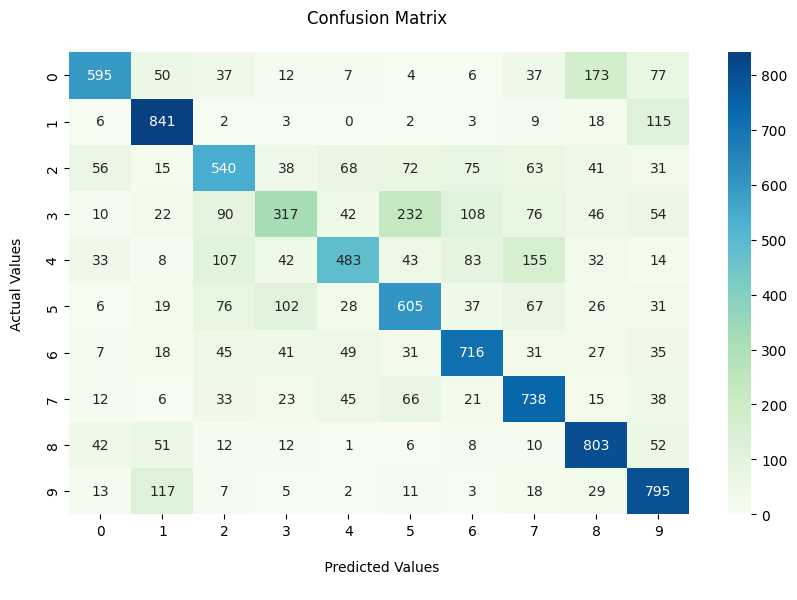

In [50]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(max_y_test, max_predictions)
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion, annot=True, fmt=".0f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');

plt.savefig("results/CNN_cifar10_augmented_confusionmatrix.png")

plt.show()

## Metrics

In [51]:
test_generator.reset()
results = model.evaluate(test_generator)

313/313 [==============================] - 1s 5ms/step - loss: 1.0655 - accuracy: 0.6443


In [52]:
from sklearn.metrics import classification_report
class_report = classification_report(max_y_test, max_predictions)
print(class_report)

#open text file
text_file = open("results/CNN_cifar10_augmented_metrics.txt", "w")

#write string to file
text_file.write(class_report)

#close file
text_file.close()

              precision    recall  f1-score   support

           0       0.76      0.60      0.67       998
           1       0.73      0.84      0.78       999
           2       0.57      0.54      0.55       999
           3       0.53      0.32      0.40       997
           4       0.67      0.48      0.56      1000
           5       0.56      0.61      0.58       997
           6       0.68      0.72      0.70      1000
           7       0.61      0.74      0.67       997
           8       0.66      0.81      0.73       997
           9       0.64      0.80      0.71      1000

    accuracy                           0.64      9984
   macro avg       0.64      0.64      0.64      9984
weighted avg       0.64      0.64      0.64      9984



## Validation Plots

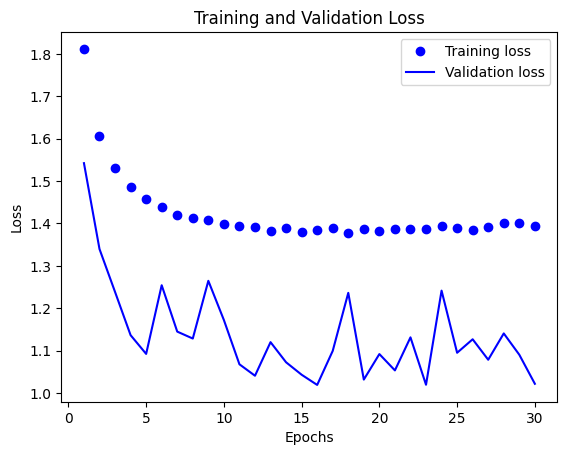

In [53]:
# plot loss

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.savefig("results/CNN_cifar10_augmented_loss.png")

plt.show()

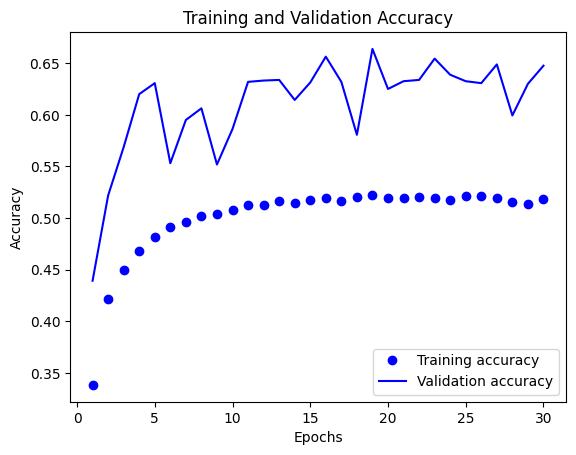

In [54]:
# plot accuracy

plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.savefig("results/CNN_cifar10_augmented_accuracy.png")

plt.show()

In [54]:
# I expected the model with augmentation and dropout to perform better than the model without

## Resnet50 Pretrained Model Predictions 

In [56]:
import tensorflow
import keras
from keras import applications
from keras import preprocessing
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

102967424/102967424 [==============================] - 1s 0us/step


In [57]:
img_path = 'images/river.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

35363/35363 [==============================] - 0s 0us/step
Predicted: [('n09468604', 'valley', 0.38834167), ('n09246464', 'cliff', 0.09706052), ('n09332890', 'lakeside', 0.094666556)]


In [58]:
img_path = 'images/tree.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

1/1 [==============================] - 0s 27ms/step
Predicted: [('n02793495', 'barn', 0.11131605), ('n04604644', 'worm_fence', 0.10649704), ('n11879895', 'rapeseed', 0.10641846)]


In [59]:
img_path = 'images/chicken.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

1/1 [==============================] - 0s 36ms/step
Predicted: [('n01514859', 'hen', 0.8507484), ('n01514668', 'cock', 0.14899172), ('n01855672', 'goose', 0.00017138451)]


In [60]:
img_path = 'images/donkey.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

1/1 [==============================] - 0s 43ms/step
Predicted: [('n02423022', 'gazelle', 0.24799536), ('n02437616', 'llama', 0.23290879), ('n02410509', 'bison', 0.13938038)]


In [64]:
img_path = 'images/boat.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

1/1 [==============================] - 0s 24ms/step
Predicted: [('n04273569', 'speedboat', 0.50600773), ('n03344393', 'fireboat', 0.16579245), ('n09332890', 'lakeside', 0.10772088)]


In [65]:
img_path = 'images/crosswalk.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

1/1 [==============================] - 0s 77ms/step
Predicted: [('n03733281', 'maze', 0.7480029), ('n03717622', 'manhole_cover', 0.07281277), ('n04355338', 'sundial', 0.030221142)]


In [66]:
img_path = 'images/traffic_light.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

1/1 [==============================] - 0s 81ms/step
Predicted: [('n06874185', 'traffic_light', 0.9994947), ('n03126707', 'crane', 0.0001888513), ('n04371774', 'swing', 0.00016358876)]


In [67]:
img_path = 'images/dog.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

1/1 [==============================] - 0s 46ms/step
Predicted: [('n02099712', 'Labrador_retriever', 0.7671822), ('n02099601', 'golden_retriever', 0.21572998), ('n02113799', 'standard_poodle', 0.005650355)]


In [68]:
img_path = 'images/cat.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

1/1 [==============================] - 0s 46ms/step
Predicted: [('n02123394', 'Persian_cat', 0.9989759), ('n02123045', 'tabby', 0.0004516678), ('n02127052', 'lynx', 0.00016683698)]


In [69]:
img_path = 'images/bird.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

1/1 [==============================] - 0s 48ms/step
Predicted: [('n01531178', 'goldfinch', 0.9966943), ('n01530575', 'brambling', 0.002008996), ('n01537544', 'indigo_bunting', 0.0003059842)]
